# Validação cruzada (Cross Validation)

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Holdout set
- 2) Validação cruzada

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

____
____
____

## 0) Estratégia "Holdout set": Conjuntos de treino, validação e teste

Como vimos, no aprendizado de máquina nós temos alguns dados (__conjunto de treino__), e depois fazemos um experimento com uma amostra de dados que nunca vimos (__conjunto de teste__) para saber o quão bem o modelo consegue generalizar.

Assim, temos o erro dentro do conjunto de treino, $E_{in}$, e o erro de generalização, pra dados daquele tipo fora desse conjunto, $E_{out}$. 
<br><br>

<div>
    <img src="images/treino_teste.png" width=500>
</div>

O problema é que, __se usarmos o conjunto de teste de qualquer forma para aprendizado, o erro que obtivermos nele deixa de refletir o erro de generalização__. 

Por exemplo, se treinarmos 3 modelos, e compararmos eles usando o conjunto de teste, o erro no teste não reflete mais o $E_{out}$.

Outro exemplo são certas transformações dos nossos dados. Imagina que pegamos nossos dados, "normalizamos" eles (ou seja, pegamos nossas features e transformamos elas de forma que tenham um range de 0 a 1), e então fazemos a divisão entre conjunto de treino e conjunto de teste. Nesse caso, você já usou o conjunto de teste para "aprender" algo (para normalizar, a gente usa o maior valor da feature na tabela). Logo, sua medida de $E_{out}$ não vale mais. 

O que fazer então? Nós usamos o __conjunto de validação__ (ou _hold-out set_).
<br><br>
<div>
    <img src="images/treino_validacao.png" width=500>
</div>

Com essa separação podemos treinar e validar nosso modelo sem necessitar usar o conjunto de teste e, dessa forma, assumir que o $E_{out}$ se __aproxima de certa forma do erro de generalização__.

<img src="images/cv.png" width=500 text="https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb">


Isso foi o que fizemos nas últimas aulas.

Após validar e escolher o modelo, nós podemos juntar os dados de treino, validação e teste em uma única base, e treinarmos o modelo final. Entende-se que os erros do nosso algoritmo só tendem a diminuir, quando fazemos isso.

## 1) Validação cruzada (cross validation)

O cross validation (CV) é uma das técnicas mais importantes no ferramental de um cientista de dados.

Operacionalmente, o CV implementa diferentes conjuntos de treino e teste (aqui chamados de **validação**), criando efetivamente diferentes modelos treinados e avaliados em diferentes suconjuntos aleatórios (os chamados **folds**) da base de dados original. 

No fim, é possível inspecionar as métricas de interesse em cada fold, bem como ter uma ideia da performance média do modelo, olhando para **a distribuição das métricas de avaliação**.

Note que este procedimento está intimamente relacionado com a avaliação da desejável habilidade de **generalização do modelo**!

A forma mais comum de fazermos CV é através da técnica **k-fold**:

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=500>

No extremo desta abordagem, podemos tomar o número $k$ de folds igual ao número de observações na base ($n$). Neste caso, utiliza-se **uma única** observação para teste, enquanto o resto do dataset é utilizado para treino. Essa abordagem é conhecida como **leave one out (LOO)**:

<img src=https://assets.datacamp.com/production/repositories/3981/datasets/8a6236f142b1ee2e4a70aae2af9507c7c580f302/Screen%20Shot%202019-01-27%20at%209.25.41%20AM.png width=500>

Note que o esforço computacional aumenta conforme $k$ aumenta, sendo máximo quando $k=n$. Por esse motivo, recomenda-se usar o LOO apenas nos casos em que o número de observções na base original é bem pequeno ($\sim 10^2$).

#### Como escolher o valor de k?
- Um __k maior__ significa que cada modelo é treinado em um __conjunto de treinamento maior__ e testado em um conjunto de __validação menor__. Em teoria, isso deve levar a um erro de previsão __(bias) menor__, pois os modelos veem mais dados disponíveis. Porém, um K maior também vai consumir __mais tempo de treino__.

- Um __k menor__ significa que o modelo é treinado em um __conjunto de treinamento menor__ e testado em um conjunto de __validação maior__. Aqui, o potencial para a distribuição de dados na validação diferir do conjunto de treinamento é maior e, portanto, devemos esperar um __erro de previsão mais alto__ em média.

No gráfico abaixo, alguns dados gerados foram divididos em 3 (esquerda) e 10 (direita) folds. Cada linha representa o melhor modelo linear para um fold (ou seja, o modelo que teria o menor erro de previsão ao testar nesse fold). Quando k = 3, uma único fold tem uma distribuição altamente diferente dos outros dois. Isso pode ter um grande impacto no erro de previsão da validação cruzada. Quando k=10, alguns folds também podem diferir muito, mas, em média, o modelo estará mais próximo do modelo que, em geral, reduz mais o erro de previsão:

<img src="images/kfolds.png" text="https://cran.r-project.org/web/packages/cvms/vignettes/picking_the_number_of_folds_for_cross-validation.html" width=700 />

Uma abordagem para responder a essa pergunta é realizar uma análise de sensibilidade para diferentes valores de k. Ou seja, avalie o desempenho do mesmo modelo no mesmo conjunto de dados com diferentes valores de k e veja como eles se comparam (raramente isso é feito).

Em geral, dividimos nosso dataset em 3, 5 ou 10 folds.

Para se aprofundar no tema: https://stats.stackexchange.com/questions/61546/optimal-number-of-folds-in-k-fold-cross-validation-is-leave-one-out-cv-always


### Sklearn

Vamos implementar o procedimento de CV utilizando o sklearn!

No [submódulo model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), temos três ferramentas muito importantes para o processo de CV:

- [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold): classe que cria os folds. Obs.: para fazer o LOO, basta colocar $k=n$ folds, ou então usar diretamente a classe que implementa o [LOO](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut);

- [Stratified K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold): classe que cria os folds de forma estratificada, ou seja, preservando a proporção das classes em cada um dos folds;

- [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate): método que recebe os folds e os utiliza para o treinamento e avaliação cruzada de modelos, segundo a métrica definida.

<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_006.png text=https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html>
<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_009.png text=https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html>

Para ilustrar o CV,  vamos utilizar os datasets artificiais que o sklearn proporciona:

_______

Vamos começar com um exemplo de **regressão**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('dados_modelo/exemplo_regressao.csv')
df.head()

,X1,X2,X3,X4,X5,y
0,-0.109610,0.546284,-0.088363,0.006422,-0.436386,79.870807
1,-1.024388,-0.926930,-0.252568,-0.059525,-3.241267,-115.324859
2,-2.650970,0.106430,1.091507,-0.254977,1.503993,35.552509
3,-0.850520,-0.138456,-0.580523,-1.224298,-0.209023,-145.413703
4,-0.322680,-0.756795,-0.250833,-1.421811,1.501334,-116.148875


In [4]:
X = df.drop(columns=['y'])
y = df['y']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.describe()

,X1,X2,X3,X4,X5
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.044967,0.022925,0.067400,-0.028468,0.006883
std,0.950297,0.949412,0.998487,1.048410,0.939770
min,-2.562334,-2.703232,-3.019512,-2.940389,-3.241267
25%,-0.610014,-0.573617,-0.602655,-0.708278,-0.662693
50%,0.090084,0.032551,0.021889,-0.026913,0.016739
75%,0.658720,0.644112,0.737839,0.613122,0.634126
max,3.078881,3.109919,3.852731,2.558199,3.137749


Vamos calcular a correlação entre as variáveis independentes:

In [7]:
df_temp = pd.concat([X_train, y_train], axis=1).corr()

df_temp['y'].abs().sort_values(ascending=False)

y     1.000000
X2    0.728207
X4    0.654894
X5    0.170297
X1    0.026012
X3    0.010812
Name: y, dtype: float64

<AxesSubplot:>

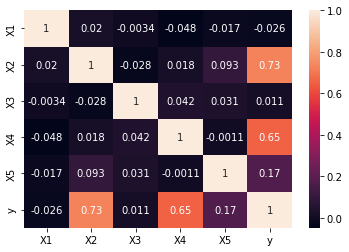

In [8]:
sns.heatmap(df_temp, annot=True)

Como é o pairplot desses dados?

Os dados não têm variação de escala tão grande, então não nos preocuparemos em normaliza-los.

**Mas nunca se esqueça que isso é bastante importante quando há grandes diferenças de escala!!**


Agora, implementamos o CV com 5 folds:

In [9]:
from sklearn.model_selection import KFold

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Como vimos acima, a classe KFold só gera os splits.

Mas, na prática, vamos usar o `cross_validate()`, que tem o KFold como argumento!!!

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

Vamos considerar nesse exemplo a métrica "neg_mean_absolute_error" e retornar o score do treino:

In [13]:
estimador = LinearRegression()

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

resultado_cv = cross_validate(estimator=estimador, X=X_train, y=y_train, 
                              scoring='neg_mean_absolute_error',
                             cv=kf5, return_train_score=True)

In [14]:
resultado_cv

{'fit_time': array([0.00169396, 0.00102615, 0.00061202, 0.00055099, 0.00053716]),
 'score_time': array([0.00049996, 0.00043893, 0.00037622, 0.00036502, 0.00149083]),
 'test_score': array([-20.84536878, -20.20615458, -19.53326373, -21.36598163,
        -15.4900974 ]),
 'train_score': array([-18.93848961, -19.05040951, -19.15834011, -18.78297146,
        -20.16018709])}

In [15]:
kf5

KFold(n_splits=5, random_state=42, shuffle=True)

In [16]:
numeros = range(101, 126)

In [17]:
for indice_train, indice_test in kf5.split(numeros):
    print(indice_train, indice_test)

[ 1  2  3  4  5  6  7  9 10 12 13 14 15 17 18 19 20 21 22 24] [ 0  8 11 16 23]
[ 0  2  3  4  6  7  8 10 11 12 14 15 16 17 18 19 20 21 23 24] [ 1  5  9 13 22]
[ 0  1  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23 24] [ 2  3  4 12 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 22 23] [17 18 20 21 24]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24] [ 6  7 10 14 19]


Podemos converter o resultado em dataframe do pandas:

In [18]:
df_result_cv = pd.DataFrame(resultado_cv)
df_result_cv

,fit_time,score_time,test_score,train_score
0,0.001694,0.000500,-20.845369,-18.938490
1,0.001026,0.000439,-20.206155,-19.050410
2,0.000612,0.000376,-19.533264,-19.158340
3,0.000551,0.000365,-21.365982,-18.782971
4,0.000537,0.001491,-15.490097,-20.160187


In [19]:
df_result_cv = df_result_cv.abs()

Vamos olhar pros resultados mais de perto... O que podemos observar de cada um dos folds?

In [20]:
df_result_cv.describe()

,fit_time,score_time,test_score,train_score
count,5.000000,5.000000,5.000000,5.000000
mean,0.000884,0.000634,19.488173,19.218080
std,0.000495,0.000482,2.338284,0.544688
min,0.000537,0.000365,15.490097,18.782971
25%,0.000551,0.000376,19.533264,18.938490
50%,0.000612,0.000439,20.206155,19.050410
75%,0.001026,0.000500,20.845369,19.158340
max,0.001694,0.001491,21.365982,20.160187


E na média e desvio padrão, como fica?

<AxesSubplot:>

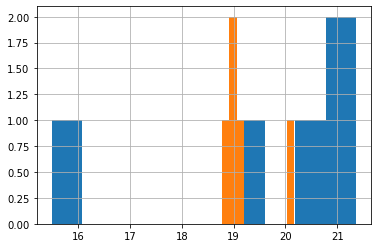

In [21]:
df_result_cv['test_score'].hist()
df_result_cv['train_score'].hist()

Numa única celula:


In [22]:
estimador = LinearRegression()

kf30 = KFold(n_splits=30, shuffle=True, random_state=42)

resultado_cv = cross_validate(estimator=estimador, X=X_train, y=y_train, 
                              scoring='neg_mean_absolute_error',
                             cv=kf30, return_train_score=True)

df_result_cv = pd.DataFrame(resultado_cv)
df_result_cv = df_result_cv.abs()

Vamos agora aumentar a quantidade de folds para 30. É esperada alguma mudança?

In [23]:
df_result_cv.describe()

,fit_time,score_time,test_score,train_score
count,30.000000,30.000000,30.000000,30.000000
mean,0.000606,0.000378,19.578270,19.246443
std,0.000162,0.000084,4.107275,0.144776
min,0.000458,0.000311,12.334666,18.902230
25%,0.000485,0.000328,16.348630,19.151702
50%,0.000534,0.000340,19.312427,19.251370
75%,0.000645,0.000390,22.329986,19.358777
max,0.001061,0.000655,28.876091,19.471281


<AxesSubplot:>

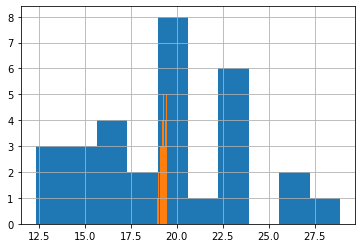

In [24]:
df_result_cv['test_score'].hist()
df_result_cv['train_score'].hist()

In [25]:
features = ['X1', 'X2', 'X3', 'X4', 'X5']
target = 'y'

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
estimador = LinearRegression()

In [28]:
i = 1
for indice_train, indice_test in kf30.split(X):
    X_train = df.iloc[indice_train].loc[:, features]
    X_test = df.iloc[indice_test].loc[:, features]
    y_train = df.iloc[indice_train].loc[:, target]
    y_test = df.loc[indice_test][target]
    
    estimador.fit(X_train, y_train)
    
    print(f'Numero Fold {i} {mean_absolute_error(y_test, estimador.predict(X_test))}')
    i += 1

Numero Fold 1 16.681597268240253
Numero Fold 2 19.371606408540224
Numero Fold 3 24.08620350261631
Numero Fold 4 24.637821514734284
Numero Fold 5 19.272479389589037
Numero Fold 6 20.448363713706037
Numero Fold 7 22.1052586164551
Numero Fold 8 18.083462919526795
Numero Fold 9 16.468918854395
Numero Fold 10 21.01795670643853
Numero Fold 11 24.1149332048246
Numero Fold 12 17.060185156993743
Numero Fold 13 23.69454986590866
Numero Fold 14 18.59120760922092
Numero Fold 15 17.292585367104078
Numero Fold 16 16.03657162120282
Numero Fold 17 17.564466108009867
Numero Fold 18 20.681508601740088
Numero Fold 19 17.426161132091515
Numero Fold 20 18.837286227462442
Numero Fold 21 21.923329499932162
Numero Fold 22 20.895981887688407
Numero Fold 23 12.241996573349024
Numero Fold 24 24.761267472191832
Numero Fold 25 20.48150697860064
Numero Fold 26 22.542087714191016
Numero Fold 27 12.592510505734017
Numero Fold 28 20.201818008575614
Numero Fold 29 23.61466871333841
Numero Fold 30 22.220696302032348


______
_____
____

E quanto a quantidade de observações?

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [30]:
from sklearn.model_selection import learning_curve

In [31]:
df = pd.read_csv('dados_modelo/exemplo_regressao.csv')
df.head()

,X1,X2,X3,X4,X5,y
0,-0.109610,0.546284,-0.088363,0.006422,-0.436386,79.870807
1,-1.024388,-0.926930,-0.252568,-0.059525,-3.241267,-115.324859
2,-2.650970,0.106430,1.091507,-0.254977,1.503993,35.552509
3,-0.850520,-0.138456,-0.580523,-1.224298,-0.209023,-145.413703
4,-0.322680,-0.756795,-0.250833,-1.421811,1.501334,-116.148875


In [32]:
X = df.drop(columns=['y'])
y = df['y']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(400, 5)

In [35]:
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [36]:
np.linspace(0.1, 1, 10) * X_train.shape[0]

array([ 40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.])

In [37]:
estimador = LinearRegression()

import sklearn
sklearn.metrics.get_scorer_names()

In [38]:
train_sizes_abs, train_scores, test_scores = learning_curve(estimator=estimador, 
               X=X_train, y=y_train, 
               train_sizes=np.linspace(0.1, 1, 10),
              scoring='neg_mean_absolute_error',
            cv=5)

In [39]:
train_sizes_abs

array([ 32,  64,  96, 128, 160, 192, 224, 256, 288, 320])

In [40]:
test_scores

array([[-21.93632208, -24.23471545, -21.50960919, -22.85222903,
        -22.87952086],
       [-20.44679678, -22.12695351, -20.02441234, -22.32648152,
        -22.03972954],
       [-20.71198081, -20.07069889, -17.93344114, -20.59786536,
        -20.76500231],
       [-20.42188429, -20.72100633, -17.79087577, -20.37165284,
        -20.6886544 ],
       [-20.24207289, -20.01808872, -17.69799096, -20.06483883,
        -20.35566359],
       [-20.42971842, -19.47111047, -17.78310192, -19.92514979,
        -20.12458215],
       [-20.35250479, -19.64582263, -17.58460806, -20.18547471,
        -20.06906023],
       [-20.39438305, -19.7605425 , -17.5569511 , -20.00842244,
        -20.08638988],
       [-20.29810666, -19.64420063, -17.45069132, -20.13525203,
        -20.18379314],
       [-20.37749986, -19.72261793, -17.48433345, -19.89534079,
        -20.15690081]])

Text(0, 0.5, 'Mean Absolute Error')

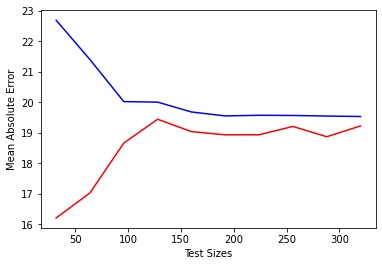

In [41]:
plt.plot(train_sizes_abs, -test_scores.mean(1), color='b')
plt.plot(train_sizes_abs, -train_scores.mean(1), color='r')


plt.xlabel('Test Sizes')
plt.ylabel('Mean Absolute Error')